In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

plt.style.use('ggplot')

In [9]:
movie_csv = "movies.csv"
movie_df = pd.read_csv(movie_csv, encoding = "ISO-8859-1")
movie_df.head()

,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Rotten_Tomatoes_Rating,Metacritic_Rating,Rated,Home_Release,Production,Country,Awards_Blurb,Languages,Month Released,Awards
0,tt0035423,Kate & Leopold,https://www.imdb.com/title/tt0035423/,movie,6.4,118.0,2001.0,"['Comedy', ' Fantasy', ' Romance']",77905.0,2001-12-11,...,50.0,44.0,PG-13,2002-Jun-11,Miramax Films,USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,"['English', ' French']",12.0,"{'Oscar.': 1, 'win': 1, 'nominations.': 5}"
1,tt0065643,The Dirty Mind of Young Sally,https://www.imdb.com/title/tt0065643/,movie,5.2,95.0,1973.0,['Comedy'],226.0,1973-04-20,...,NaN,NaN,X,0,NaN,USA,NaN,['English'],4.0,{}
2,tt0067716,Schlock,https://www.imdb.com/title/tt0067716/,movie,5.7,80.0,1973.0,"['Comedy', ' Horror', ' Sci-Fi']",1221.0,1973-04-11,...,71.0,NaN,PG,2001-Oct-02,Jack H. Harris Enterprises,USA,1 win & 1 nomination.,['English'],4.0,"{'win': 1, 'nomination.': 1}"
3,tt0068156,1776,https://www.imdb.com/title/tt0068156/,movie,7.6,141.0,1972.0,"['Drama', ' Family', ' History', ' Musical']",7588.0,1972-11-09,...,69.0,NaN,G,2002-Jul-02,Sony Pictures Home Entertainment,USA,Nominated for 1 Oscar. Another 1 win & 1 nomin...,['English'],11.0,Could not parse awards
4,tt0068168,Across 110th Street,https://www.imdb.com/title/tt0068168/,movie,7.0,102.0,1972.0,"['Action', ' Crime', ' Drama', ' Thriller']",4923.0,1972-12-19,...,81.0,NaN,R,2001-Oct-16,MGM,USA,NaN,"['English', ' Italian']",12.0,{}


In [10]:
for i in movie_df.columns:
    print(i)

Const
Title
URL
Title Type
IMDb Rating
Runtime (mins)
Year
Genres
Num Votes
Release Date
Directors
Box_Office
Rotten_Tomatoes_Rating
Metacritic_Rating
Rated
Home_Release
Production
Country
Awards_Blurb
Languages
Month Released
Awards


In [11]:
#Writeng han reading as a csv turns lists back into strings, only with even more to deal with.  I got the number of genres by counting the commas with the following function

movie_df['Num_Genres'] = ''
for index, row in movie_df.iterrows():
    x=1
    for i in row['Genres']:
        if i == ',':
            x+=1
    movie_df.loc[index, 'Num_Genres'] = x
movie_df['Num_Genres'] = movie_df['Num_Genres'].astype(int)

In [12]:
director_df = movie_df.groupby('Directors').agg({
    'Num_Genres':'mean',
    'Box_Office':'mean',
    'IMDb Rating':'mean',
    'Runtime (mins)': 'mean',
    'Const':'count'
})
director_df['Num_Genres'] = director_df['Num_Genres'].round(0)
director_df.head(30)
director_genres_df = director_df.groupby('Num_Genres').agg({
    'Box_Office':'mean',
    'IMDb Rating':'mean',
    'Runtime (mins)': 'mean',
    'Const':'sum'
}).reset_index()
director_genres_df.rename({
    'Box_Office': 'Average Box Office',
    'IMDb Rating': 'Average Rating',
    'Runtime (mins)': 'Average Length (mins)',
    'Const':'Number of Directors'
}, axis = 1, inplace = True)
director_genres_df.head()

,Num_Genres,Average Box Office,Average Rating,Average Length (mins),Number of Directors
0,1.0,1.680679e+07,6.055375,96.069784,296
1,2.0,2.625330e+07,6.109501,97.596238,2014
2,3.0,3.788758e+07,6.158491,101.654897,2184
3,4.0,5.760001e+07,6.077326,100.497414,808
4,5.0,1.011211e+08,6.251387,93.673791,173


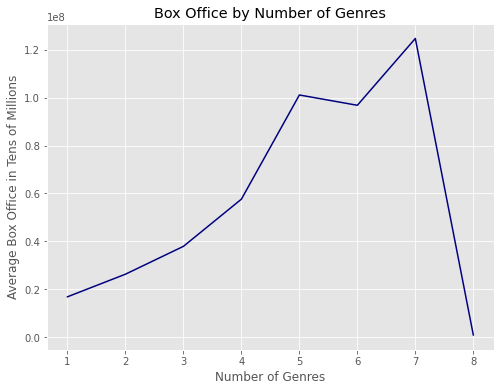

In [13]:

director_genres_df.plot.line('Num_Genres','Average Box Office', figsize = (8,6), legend = False, color = 'navy')
plt.title("Box Office by Number of Genres")
plt.ylabel("Average Box Office in Tens of Millions")
plt.xlabel("Number of Genres")
plt.savefig("BoxOfficeByGenres.png")


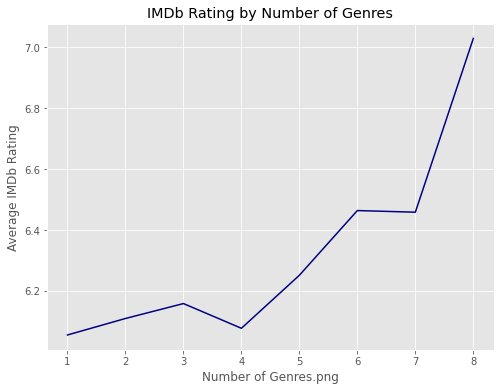

In [14]:
director_genres_df.plot.line('Num_Genres','Average Rating', figsize = (8,6), legend=False, color = 'navy')
plt.title("IMDb Rating by Number of Genres")
plt.ylabel("Average IMDb Rating")
plt.xlabel("Number of Genres.png")
plt.savefig("IMDbRatingByGenres.png")

In [15]:
numGenres_df = movie_df.groupby('Num_Genres').agg({
    'Box_Office':'mean',
    'IMDb Rating':'mean',
    'Runtime (mins)': 'mean',
    'Const':'count'
}).reset_index()

numGenres_df.rename({
    'Box_Office': 'Average Box Office',
    'IMDb Rating': 'Average Rating',
    'Runtime (mins)': 'Average Length (mins)',
    'Const':'Number of Movies'
}, axis = 1, inplace = True)
numGenres_df

,Num_Genres,Average Box Office,Average Rating,Average Length (mins),Number of Movies
0,1,3.173517e+07,6.316482,98.794159,723
1,2,3.615742e+07,6.256547,100.828824,1703
2,3,5.074879e+07,6.279738,105.186219,1757
3,4,5.994916e+07,6.209759,105.089912,912
4,5,8.276961e+07,6.200292,101.446064,343
5,6,8.967723e+07,6.191892,96.099099,111
6,7,1.047409e+08,6.674074,84.185185,27
7,8,1.374911e+07,6.872727,83.545455,11


In [16]:
numGenres_df = numGenres_df.head(6)

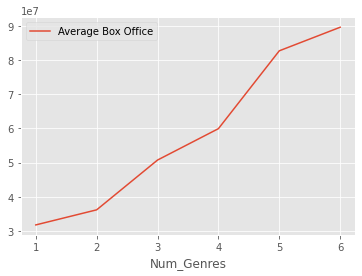

In [17]:
numGenres_df.plot.line('Num_Genres','Average Box Office')

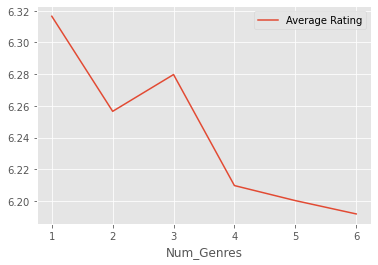

In [18]:
numGenres_df.plot.line('Num_Genres','Average Rating')

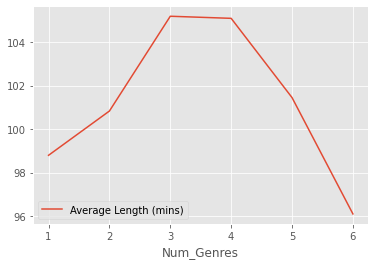

In [19]:
numGenres_df.plot.line('Num_Genres','Average Length (mins)')

In [20]:
rating_df = movie_df[['Const','IMDb Rating','Rotten_Tomatoes_Rating','Metacritic_Rating', 'Awards_Blurb','Box_Office']]
def award_gen(x):
    y = {}
    try:
        x=x.split(" ")
        for i in range(len(x)):
                try:
                    x[i] = int(x[i])
                    y[x[i+1]] = x[i]
                except:
                    pass
        if x[0] == 'Nominated':
            y['nominations.'] += int(x[2])
        return y
    except:
        return "Could not parse awards"
        
rating_df['Awards'] = movie_df['Awards_Blurb'].apply(award_gen)
movie_df.head()
def nomination_extractor(x):
    try:
        return(int(x['nominations.']))
    except:
        return np.NaN
        
rating_df['Nominations'] = rating_df['Awards'].apply(nomination_extractor)
rating_df = rating_df.dropna()
rating_df['IMDb_Rating_Adj'] = rating_df['IMDb Rating']*10
rating_df['Triple_Score'] = (rating_df["IMDb_Rating_Adj"] + rating_df['Rotten_Tomatoes_Rating'] + rating_df['Metacritic_Rating'])/3
rating_df = rating_df[['Rotten_Tomatoes_Rating','Metacritic_Rating','IMDb_Rating_Adj','Nominations', 'Triple_Score', 'Box_Office']]
rating_df

,Rotten_Tomatoes_Rating,Metacritic_Rating,IMDb_Rating_Adj,Nominations,Triple_Score,Box_Office
0,50.0,44.0,64.0,5.0,52.666667,47095453.0
232,94.0,82.0,76.0,2.0,84.000000,30966.0
630,94.0,82.0,87.0,20.0,87.666667,4548170.0
736,82.0,62.0,64.0,4.0,69.333333,14867086.0
876,81.0,65.0,83.0,7.0,76.333333,656161.0
...,...,...,...,...,...,...
5578,83.0,70.0,73.0,17.0,75.333333,8064239.0
5579,95.0,81.0,76.0,88.0,84.000000,248752120.0
5580,68.0,58.0,64.0,2.0,63.333333,31315980.0
5581,67.0,55.0,62.0,14.0,61.333333,56499874.0


In [21]:
rating_matrix = rating_df.corr()
columns = []
for i in rating_matrix.columns:
    columns.append(i)
for index, row in rating_matrix.iterrows():
    counter = 0
    for i in columns:
        counter += row[i]
    rating_matrix.loc[index,'correlation_sum'] = counter -1
rating_matrix


,Rotten_Tomatoes_Rating,Metacritic_Rating,IMDb_Rating_Adj,Nominations,Triple_Score,Box_Office,correlation_sum
Rotten_Tomatoes_Rating,1.000000,0.935576,0.739918,0.455368,0.981973,0.113439,3.226275
Metacritic_Rating,0.935576,1.000000,0.727381,0.501974,0.967255,0.102375,3.234561
IMDb_Rating_Adj,0.739918,0.727381,1.000000,0.436885,0.826568,0.165705,2.896457
Nominations,0.455368,0.501974,0.436885,1.000000,0.492042,0.360355,2.246624
Triple_Score,0.981973,0.967255,0.826568,0.492042,1.000000,0.126084,3.393921
Box_Office,0.113439,0.102375,0.165705,0.360355,0.126084,1.000000,0.867958


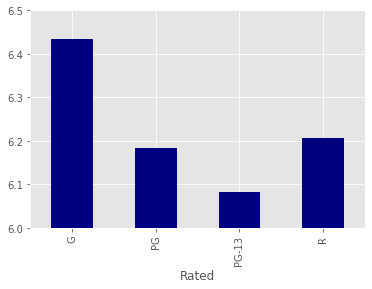

In [72]:
rated_df_rating = movie_df.groupby('Rated').agg({
    "IMDb Rating":'mean',
    "Const":'count',
    'Box_Office':'mean',
    'Num_Genres':'mean'
}).reset_index()
rated_df_rating = rated_df_rating[rated_df_rating['Rated'].isin(['G','PG','PG-13','R'])]
rated_df_rating.plot.bar('Rated', 'IMDb Rating', ylim = (6.0, 6.5), color = 'navy', legend = False)

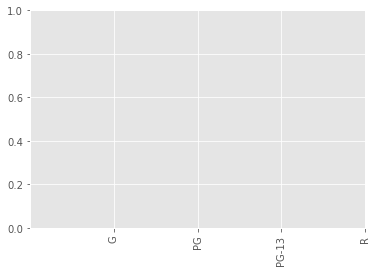

In [87]:
ratings_of_interest = ['G','PG','PG-13','R']
rating_dict = {}
rated_rate = []
for rating in ratings_of_interest:
    rating_dict[rating]=movie_df[movie_df['Rated']==rating].dropna()
for rating in ratings_of_interest:
    rated_rate.append(rating_dict[rating]['IMDb Rating'])
plt.box(rated_rate)
plt.xticks(range(1,len(ratings_of_interest)+1), ratings_of_interest, rotation = 90)
plt.show()

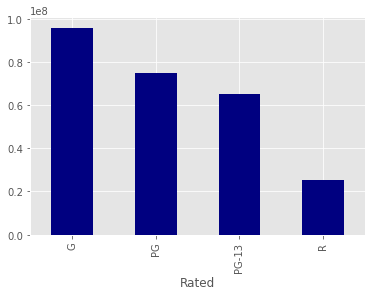

In [73]:
rated_df_rating = movie_df.groupby('Rated').agg({
    "IMDb Rating":'mean',
    "Const":'count',
    'Box_Office':'mean',
    'Num_Genres':'mean'
}).reset_index()
rated_df_rating = rated_df_rating[rated_df_rating['Rated'].isin(['G','PG','PG-13','R'])]
rated_df_rating.plot.bar('Rated', 'Box_Office', color = 'navy', legend = False)

In [24]:
rated_df_rating

,Rated,IMDb Rating,Const,Box_Office,Num_Genres
1,G,6.432877,146,9.586538e+07,4.178082
7,PG,6.182633,1071,7.468047e+07,3.057890
8,PG-13,6.082132,1276,6.527015e+07,2.731975
10,R,6.206247,2401,2.509392e+07,2.748022


The P Value is 1.4781248563206349e-130


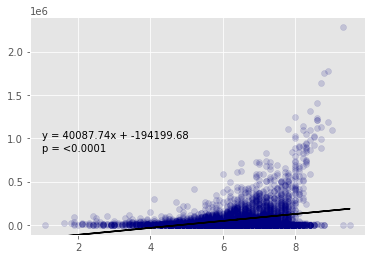

In [61]:
def decommarizer(x):
    try:
        x = int(x.replace(',',''))
    except:
        pass
    return x

movie_df['Num Votes'] = movie_df['Num Votes'].apply(decommarizer)

plot = [1,1000000]

def Scatter_w_Trend(df,x,y,plot_location, y_limit=None):
    new_df = df[[x,y]].dropna()
    new_df[x] = new_df[x].astype(float)
    new_df[y] = new_df[y].astype(float)
    new_df.head()
    x_list = new_df[x].tolist()
    y_list = new_df[y].tolist()
    plt.scatter(x_list, y_list, alpha = 0.15, color = 'navy')
    plt.ylim(y_limit)
    m, b, rSquare, pValue, stderr = st.linregress(x_list,y_list)
    line = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    print(f"The P Value is {pValue}")
    if pValue < 0.0001:
        pValue = "<0.0001"
    plt.annotate(line, plot_location, color="black")
    plot_location[1] = 0.85*plot_location[1]
    plt.annotate(f"p = {pValue}",plot_location, color = 'black' )
    fit_line_y = new_df[x] * m + b
    plt.plot(x_list, fit_line_y, color = 'black')

Scatter_w_Trend(movie_df, 'IMDb Rating','Num Votes',plot)

The P Value is 0.16435885731299066


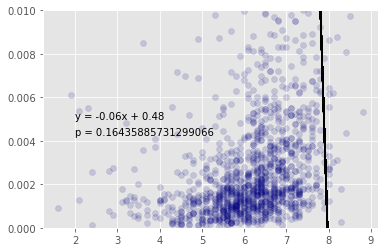

In [58]:
movie_df['Votes Index'] = movie_df['Num Votes']/movie_df['Box_Office']
plot = [2, 0.005]
y_limit = (0,0.01)
Scatter_w_Trend(movie_df, 'IMDb Rating','Votes Index',plot,y_limit)

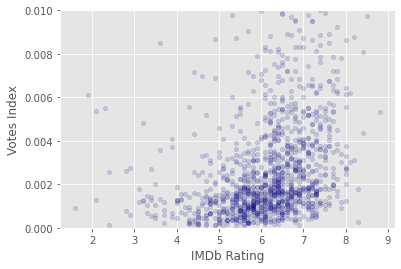

In [27]:
movie_df.plot.scatter('IMDb Rating','Votes Index', ylim = (0,0.01), alpha = 0.15, color = 'navy')
plot = [1,60]
Scatter_w_Trend(movie_df, 'IMDb Rating','Votes Index',plot)